##Importing modules and libraries

In [0]:
import sys
from google.colab.patches import cv2_imshow

In [4]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet') #Loading Pretrained  Resnet50 with imagenet weights

Using TensorFlow backend.
W0721 06:15:49.304389 140185045526400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 06:15:49.339049 140185045526400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 06:15:49.349156 140185045526400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0721 06:15:49.382841 140185045526400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session inste

102858752/102853048 [==============================] - 3s 0us/step


In [0]:


import cv2
import urllib.request
from PIL import Image

url = 'https://media.karousell.com/media/photos/products/2018/08/20/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg'
# image = Image.open(urllib.request.urlopen(url))

from PIL import Image
import requests
from io import BytesIO

response = requests.get(url)
img = Image.open(BytesIO(response.content))



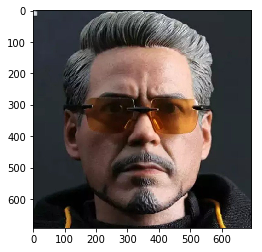

In [7]:
import matplotlib.pyplot as plt
plt.imshow(img)
  

In [0]:
img = np.array(img)
img = cv2.resize(img,(224, 224))

In [0]:
model = ResNet50(weights='imagenet')

# img = image.load_img(img, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

In [0]:
np.argmax(preds[0])
#  836: 'sunglass',
#  837: 'sunglasses, dark glasses, shades',

837

In [11]:
print('Predicted:', decode_predictions(preds, top=1)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n04356056', 'sunglasses', 0.6892229)]


In [12]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
# import keras
# from keras import backend as K
# from keras.preprocessing import image
# # import keras.backend as K
# # import numpy as np
# import cv2
# import sys
# from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

# # img = test_features[mis[im]]
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)
# preds = model.predict(x)
# class_idx = np.argmax(preds[0])
# class_output = model.output[:, class_idx]
# last_conv_layer = model.get_layer("activation_98")#("separable_conv2d_2")

# #   print(preds)

# grads = K.gradients(class_output, last_conv_layer.output)[0]
# pooled_grads = K.mean(grads, axis=(0, 1, 2))
# iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
# pooled_grads_value, conv_layer_output_value = iterate([x])
# for i in range(24):
#     conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# heatmap = np.mean(conv_layer_output_value, axis=-1)
# heatmap = np.maximum(heatmap, 0)
# heatmap /= np.max(heatmap)

# # img = cv2.imread(img_path)
# # (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
# # from google.colab.patches import cv2_imshow
# # idx = np.where(train_labels[:]==5)[0]
# # features_idx = train_features[idx,::]
# # img_num = np.random.randint(features_idx.shape[0])
# # img = features_idx[img_num]

# # img = test_features[mis[im]]
# # img = np.array(img)
# heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
# heatmap = np.uint8(255 * heatmap)
# heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
# superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
# # cv2.imshow(img)
# # cv2.imshow(superimposed_img)
# # cv2.waitKey(0)
# #   plt.subplot(50, 2, im)
# #   plt.subplot(1,2)
# # print(class_names[int(test_labels[mis[im]])])
# print('Original')
# plt.imshow(img)
# plt.show()
# print('Gradcam')
# plt.imshow(superimposed_img)
# plt.show()




#Gradcam

In [35]:
last_conv_layer = model.get_layer("activation_98")
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(64):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

(?, 7, 7, 2048)
(2048,)


In [36]:
heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

(7, 7, 2048)
(7, 7)


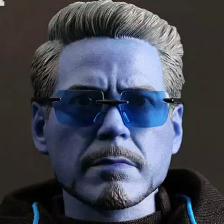

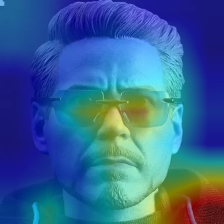

In [37]:

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2_imshow(superimposed_img)

#Part - 2 

Receptive field calculation

##Formulas:
##N_out = [(N_in+2p-k)/s]+1

##J_out = J_in * s

##R_out = R_in +(k-1)*J_in

##Start_out  = Start_in + [((k-1)/2)-P]*J_in

Layer 1:
  
 Receptive field 3x3x3 
   
 Explanation: Stride = 1,padding =1 ,kernel size = 3X3x3
 

  
Layer 2:
  
 Receptive Field = 5x5x5
  
 Explanation :stride = 1 ,padding=1,kernel size = 3x3x3
  
 R_out = 3 + 1*(3-1) = 5
 
 Layer 3 :
 
 Receptive Field = 9x9x9
 
 Explanation :stride = 2 ,padding=1,kernel size = 3x3x3
 
 R_out = 5 +2*(3-1) = 9
 
 Layer 4 :
 
 Receptive Field = 13x13x13
 
 Explanation :stride = 2 ,padding=1,kernel size = 3x3x3
 
  R_out = 9 +2*(3-1) = 13
  
 Layer 5 :
 
 Receptive Field = 21x21x21
 
 Explanation :stride = 2 ,padding=1,kernel size = 3x3x3
 
  R_out = 13 +4*(3-1) = 21
  
  Layer 6 :
 
 Receptive Field = 29x29x29
 
 Explanation :stride = 2 ,padding=1,kernel size = 3x3x3
 
  R_out = 21 +4*(3-1) = 29
  
  Layer 7 :
 
 Receptive Field = 45x45x45
 
 Explanation :stride = 2 ,padding=1,kernel size = 3x3x3
 
  R_out = 29 +8*(3-1) = 45
 
 
 
  
  
  